<a href="https://colab.research.google.com/github/OlegSV117/project/blob/dev-kraken/TV7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 7. Многомерный статистический анализ. Линейная регрессия

**Пример 1** Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [8]:
import numpy as np

# количество наблюдений
n = 10

x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

Для нахождения коэффициентов регрессии $a$ и $b$ воспользуемся приведенными выше формулами:

In [9]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [10]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):

$$y = 444.2 +  2.6\cdot x$$

Найдем коэффициент корреляции $r$ с помощью коэффициента $b$ и средних квадратического отклонения, посчитанного для массивов $x$ и $y$:

In [11]:
r = b * np.std(x) / np.std(y)
r

0.8874900920739162

Найдем коэффициент детерминации $R^2$:

In [12]:
R2 = r**2
R2

0.7876386635293682

Это означает, что 78.8% вариации значения поведенческого кредитного скоринга ($y$) объясняется вариацией фактора $x$ — заработной платы заемщиков.

С помощью этого уравнения регрессии посчитаем значения, предсказанные моделью значения  поведенческого кредитного скоринга :

In [13]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [14]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Так как $\overline {A}$ равна 11.5%, что  превышает 8-10 %, модель плохо описывает эмпирические данные. Для оценки значимости 

уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [15]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

Таблицу значений F-критерия Фишера ($F_{кр}$) можно посмотреть по ссылке: <a href='https://www.chem-astu.ru/science/reference/F-statistic.html'>Таблица критерия Фишера</a>

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 10 - 2 = 8$ табличное значение критерия: $F_{кр} = 5.32$.

Так как $F_{факт} = 29.67 > F_{кр} = 5.32$, уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 10 - 2 = 8$ и $\alpha = 0.05$ получим

(см. <a href='https://statpsy.ru/t-student/t-test-tablica/'>Таблицу критических значений t-критерия Стьюдента</a>):

$$t_{кр} = 2.306$$

Определим стандартную ошибку $S_{ост}$ (переменная **s_residual**) и случайные ошибки $m_a, \; m_b$:

In [20]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))

print('s_residual = {}\nm_a = {}\nm_b = {}'.format(s_residual, m_a, m_b))

s_residual = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [21]:
t_a = a / m_a
t_a

7.866210524668864

In [22]:
t_b = b / m_b
t_b

5.447168150485579

Фактические значения t-статистики больше табличного значения:

$$t_a = 7.87 > t_{кр} = 2.306, \; t_b = 5.55 > t_{кр} = 2.306,$$

поэтому параметры $a$ и $b$ не случайно отличаются от нуля, то есть они статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$),

используя значение $t_{кр}$, равное 2.306 (переменная **t_cr**):

In [23]:
t_cr = 2.306

In [24]:
delta_a = t_cr * m_a
delta_a

125.80735654291844

In [25]:
delta_b = t_cr * m_b
delta_b

1.0718524687865365

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [26]:
gamma_a_min = a - delta_a
gamma_a_min

318.37000078144115

In [27]:
gamma_a_max = a + delta_a
gamma_a_max

569.9847138672781

In [28]:
gamma_b_min = b - delta_b
gamma_b_min

1.5486864136162284

In [29]:
gamma_b_max = b + delta_b
gamma_b_max

3.6923913511893014

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, 

являются статистически значимыми и отличны от нуля. Поместим исходные и предсказанные данные в датафрейм **df**:

In [30]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df

,x,y,y_pred
0,35.0,401.0,535.896218
1,45.0,574.0,562.101607
2,190.0,874.0,942.079745
3,200.0,919.0,968.285134
4,40.0,459.0,548.998913
5,70.0,739.0,627.615079
6,54.0,653.0,585.686457
7,150.0,902.0,837.258190
8,120.0,746.0,758.642023
9,110.0,832.0,732.436634


Отсортируем значения по полю **x**:

In [31]:
df = df.sort_values('x')
df

,x,y,y_pred
0,35.0,401.0,535.896218
4,40.0,459.0,548.998913
1,45.0,574.0,562.101607
6,54.0,653.0,585.686457
5,70.0,739.0,627.615079
9,110.0,832.0,732.436634
8,120.0,746.0,758.642023
7,150.0,902.0,837.258190
2,190.0,874.0,942.079745
3,200.0,919.0,968.285134


Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:

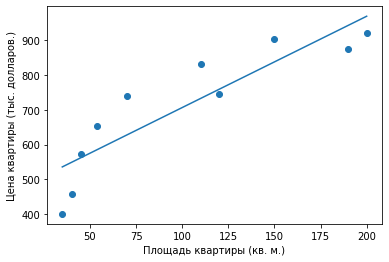

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])
plt.xlabel('Площадь квартиры (кв. м.)')
plt.ylabel('Цена квартиры (тыс. долларов.)')
plt.show()

МАТРИЧНЫЙ МЕТОД  ПОИСКА КОЭФФИЦИЕНТОВ

In [34]:
import seaborn as sns
X=x.reshape((10,1))
X

array([[ 35.],
       [ 45.],
       [190.],
       [200.],
       [ 40.],
       [ 70.],
       [ 54.],
       [150.],
       [120.],
       [110.]])

In [35]:
Y=y.reshape((10,1))
Y

array([[401.],
       [574.],
       [874.],
       [919.],
       [459.],
       [739.],
       [653.],
       [902.],
       [746.],
       [832.]])

In [36]:
X=np.hstack([np.ones((10,1)),X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [37]:
B=np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
B

array([444.17735732,   2.62053888])

Ответы с пердыдущим способом совпали!!!

Градиентный спуск

In [38]:
 x

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

In [39]:
y

array([401., 574., 874., 919., 459., 739., 653., 902., 746., 832.])

In [40]:
def mse_(B1,y=y,x=x, n=10):
  return np.sum((B1*x-y)**2)/n

In [41]:
alpha=1e-6
alpha

1e-06

In [66]:
B1=50

n=10
for i in range (10):
  B1 -=alpha*(2/n)*np.sum((B1*x-y)*x)
  print ('B1={}'.format(B1))

B1=48.7846234
B1=47.60273431453512
B1=46.45341005541987
B1=45.335753357480876
B1=44.24889167807154
B1=43.1919765158873
B1=42.16418274854975
B1=41.16470798844241
B1=40.19277195629526
B1=39.247615872029066


In [67]:
for i in range (100):
  B1 -= alpha*(2/n)*np.sum((B1*x-y)*x)
  if i%10==0:
    print ('Iteration:{i}, B1={B1}, mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration:0, B1=38.328501862383874, mse=14553192.927182412
Iteration:10, B1=30.42118507532725, mse=8347107.3781591
Iteration:20, B1=24.44137137997855, mse=4797872.10702661
Iteration:30, B1=19.919208831791284, mse=2768078.7839498087
Iteration:40, B1=16.49937752030173, mse=1607248.1768842682
Iteration:50, B1=13.913171015245329, mse=943373.8390489544
Iteration:60, B1=11.95738329427648, mse=563706.7853429933
Iteration:70, B1=10.478342234711478, mse=346576.7300680993
Iteration:80, B1=9.359835132726252, mse=222400.92802394586
Iteration:90, B1=8.513977521741912, mse=151385.28814034205


In [ ]:
mse_()

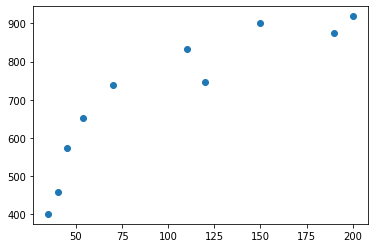

In [62]:
plt.scatter(x,y)
plt.show()

In [65]:
np.corrcoef(x,y)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])